In [1]:
# Import the necessary libraries for manipulation and visualization
import numpy as np
import matplotlib.pyplot as plt

#Import PCA for dimensionality reduction
from sklearn.decomposition import PCA

#Import the preprocessing tool to standardize our features
from sklearn.preprocessing import StandardScaler

#Import our dataset
from sklearn.datasets import load_breast_cancer

In [3]:
# Load the cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels

In [5]:
# Understand the scope of our dataset
num_rows, num_columns = data.data.shape

# Print the number of rows and columns
print(f'Number of rows (samples): {num_rows}')
print(f'Number of columns (features): {num_columns}')

Number of rows (samples): 569
Number of columns (features): 30


In [7]:
# Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

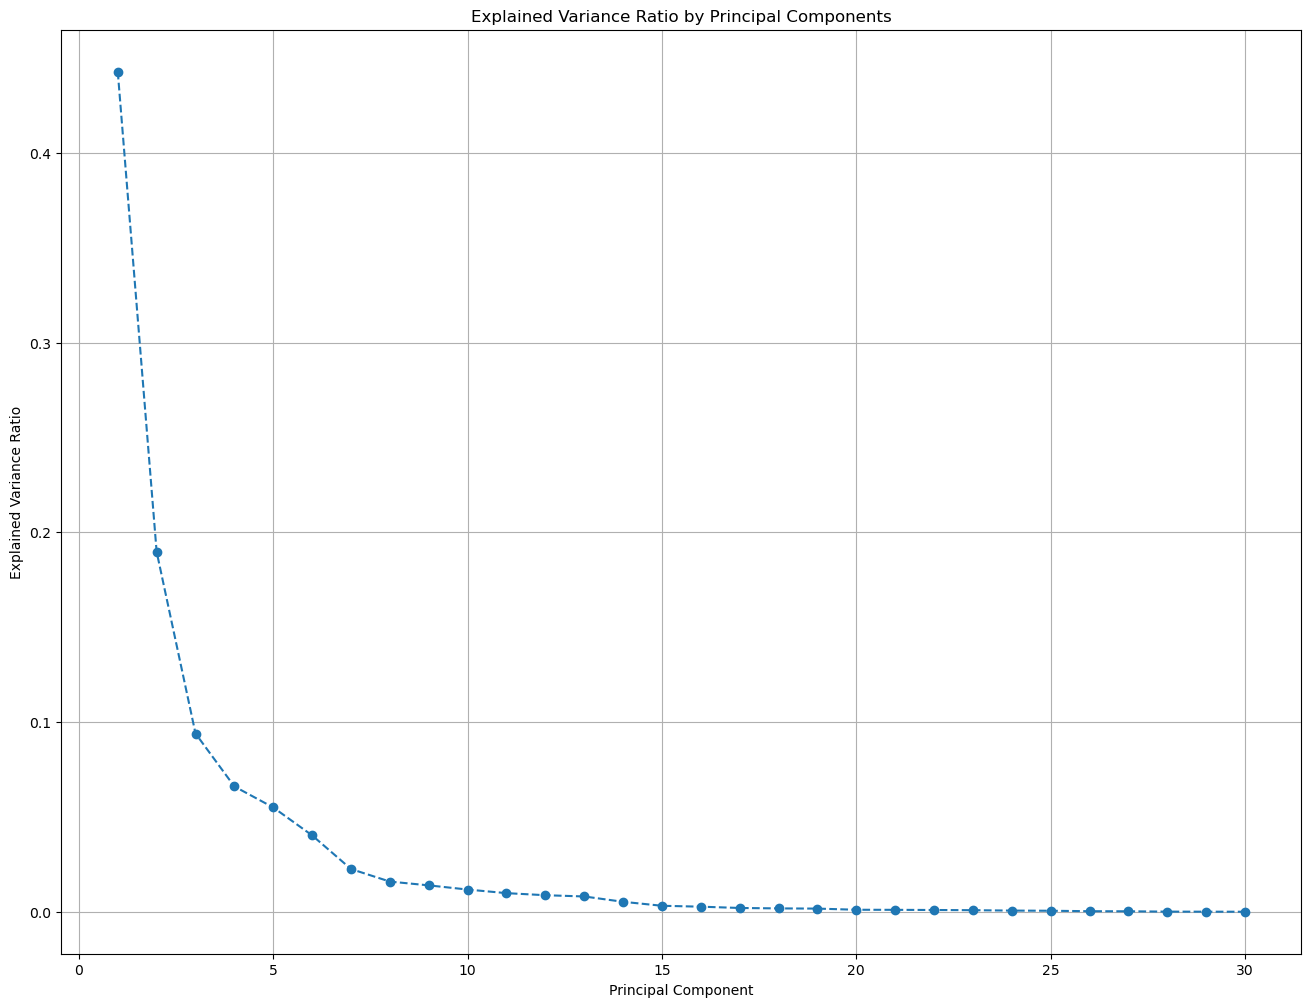

Cumulative explained variance by the first 30 components: [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]
Number of components to explain 95% of the variance: 10


In [11]:
# Visualize the explained variance ratio
plt.figure(figsize=(16, 12))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Print the cumulative explained variance ratio 
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f"Cumulative explained variance by the first 30 components: {cumulative_variance[:30]}")

# Identify which components explain most of the variance
n_components_to_keep = np.argmax(cumulative_variance >= 0.95) + 1  # Keep components that explain at least 95% of the variance
print(f"Number of components to explain 95% of the variance: {n_components_to_keep}")

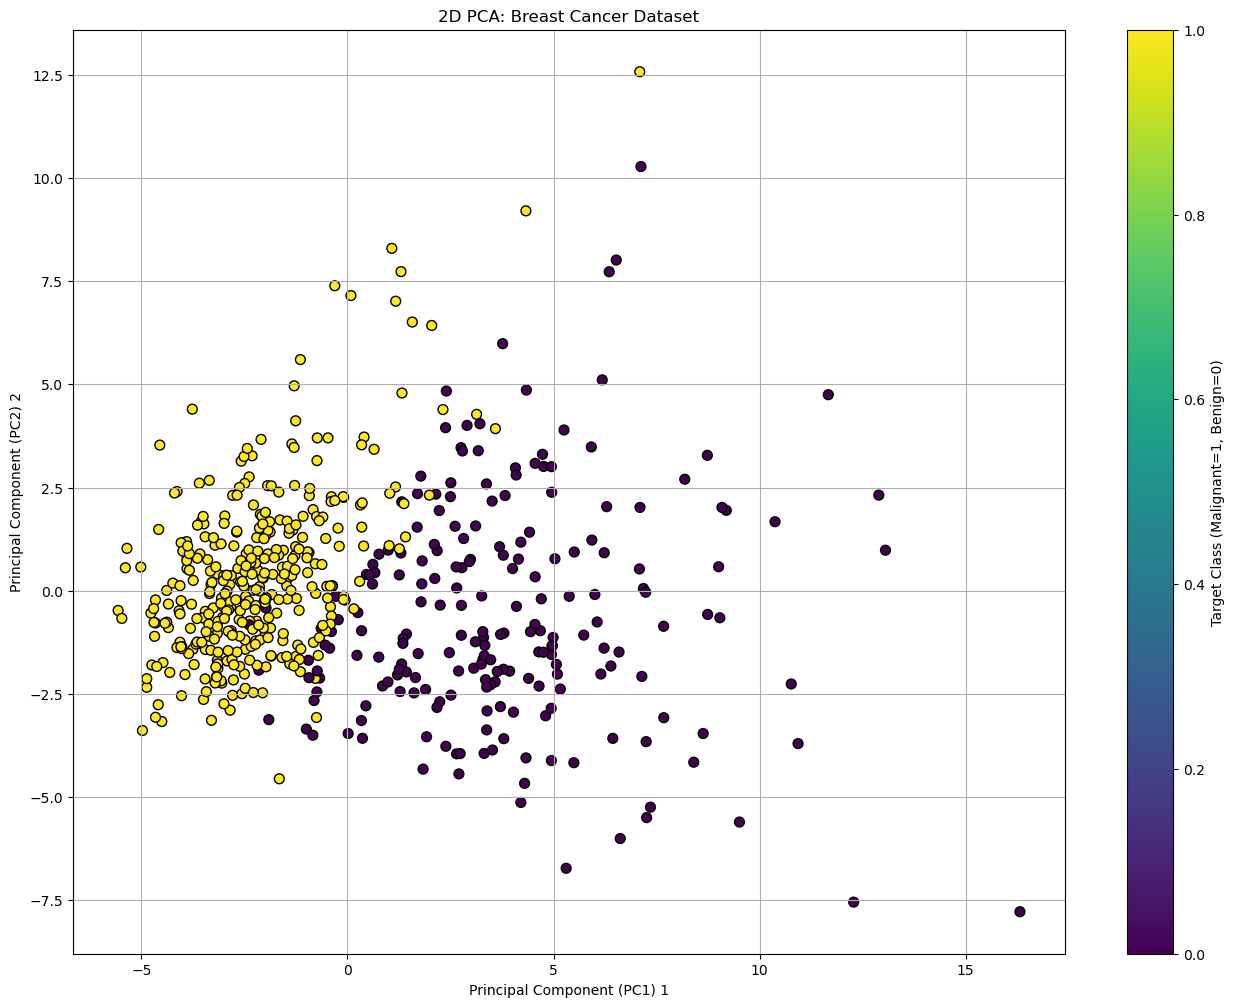

Explained variance ratio for the 2 components: [0.44272026 0.18971182]
Total variance explained by 2 components: 0.6324320765155944


In [13]:
# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the 2 principal components
plt.figure(figsize=(16, 12))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('2D PCA: Breast Cancer Dataset')
plt.xlabel('Principal Component (PC1) 1')
plt.ylabel('Principal Component (PC2) 2')
plt.colorbar(label='Target Class (Malignant=1, Benign=0)')
plt.grid(True)
plt.show()

# Check the explained variance ratio of the 2 components
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio for the 2 components: {explained_variance}")
print(f"Total variance explained by 2 components: {sum(explained_variance)}")

Accuracy: 0.97
Confusion Matrix:
[[ 60   3]
 [  2 106]]


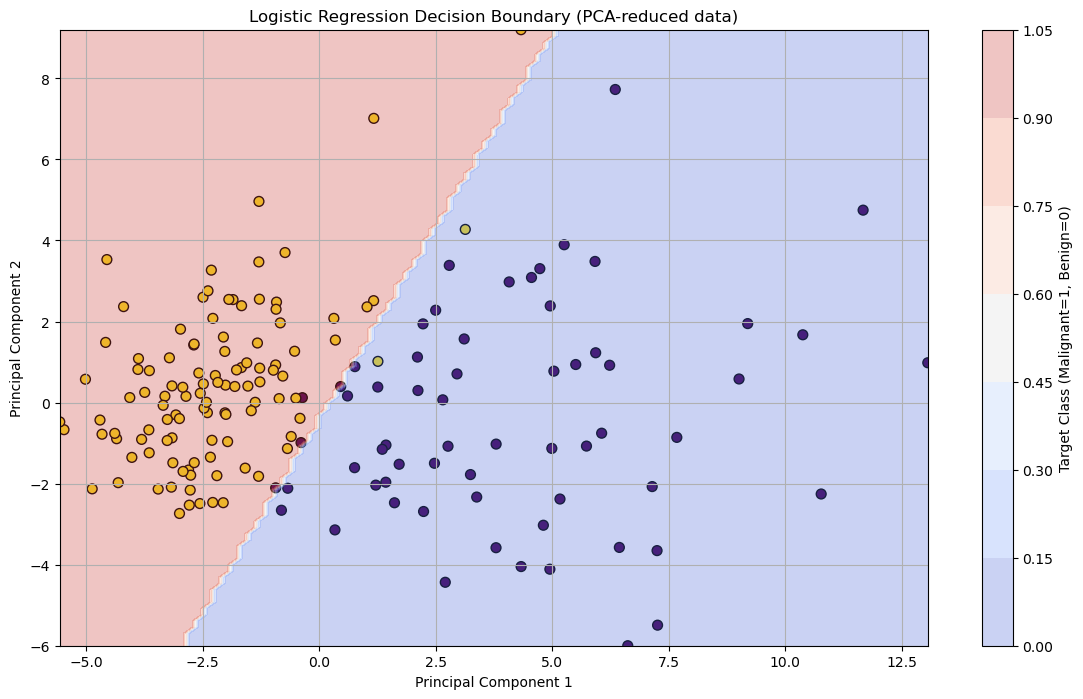

In [15]:
# Import the necessary libraries for manipulation and visualization
import numpy as np
import matplotlib.pyplot as plt

#Import our dataset
from sklearn.datasets import load_breast_cancer

#Import PCA for dimensionality reduction
from sklearn.decomposition import PCA

#Import the preprocessing tool to standardize our features
from sklearn.preprocessing import StandardScaler

#Import
from sklearn.linear_model import LogisticRegression

#Import
from sklearn.model_selection import train_test_split

#Import
from sklearn.metrics import accuracy_score, confusion_matrix


# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels

# Standardize the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Visualize the decision boundary and data points
plt.figure(figsize=(14, 8))

# Plot the data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50, label='Data points')

# Create a grid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100))

# Predict over the grid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Add plot labels
plt.title('Logistic Regression Decision Boundary (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Class (Malignant=1, Benign=0)')
plt.grid(True)
plt.show()